In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df = pd.read_csv(r"/kaggle/input/real-estate-price-prediction/Real estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
nulldf = df.isnull()
nulldf

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


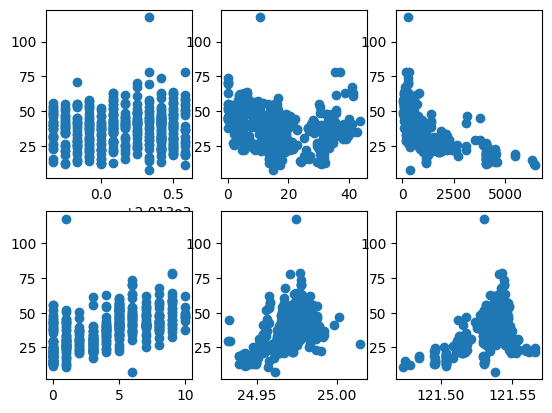

In [4]:
plt.subplot(2,3,1)
plt.scatter(df.loc[:, "X1 transaction date"],df.loc[:,"Y house price of unit area"])
plt.subplot(2,3,2)
plt.scatter(df.loc[:, "X2 house age"],df.loc[:,"Y house price of unit area"])
plt.subplot(2,3,3)
plt.scatter(df.loc[:, "X3 distance to the nearest MRT station"],df.loc[:,"Y house price of unit area"])
plt.subplot(2,3,4)
plt.scatter(df.loc[:, "X4 number of convenience stores"],df.loc[:,"Y house price of unit area"])
plt.subplot(2,3,5)
plt.scatter(df.loc[:, "X5 latitude"],df.loc[:,"Y house price of unit area"])
plt.subplot(2,3,6)
plt.scatter(df.loc[:, "X6 longitude"],df.loc[:,"Y house price of unit area"])



In [7]:
#removed 1st and last column

df1=df.drop(['No','Y house price of unit area'], axis=1)
df1

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [40]:
from sklearn.model_selection import train_test_split
y= df.loc[:,"Y house price of unit area"]

X_train,X_test, y_train ,y_test= train_test_split(df1,y,test_size=0.25,random_state=42)
X1_train= X_train.loc[:,"X1 transaction date"]
X1_test= X_test.loc[:,"X1 transaction date"]
"""
x1train= df.loc[:308, "X1 transaction date"]
x1test= df.loc[308:414,"X1 transaction date"]
y1train=df.loc[:308,"Y house price of unit area"]
y1test=df.loc[308:414,"Y house price of unit area"]"""
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X1train= min_max_scaler.fit_transform(X_train)
X1test= min_max_scaler.fit_transform(X_test)
#importing model
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
class LinearRegression:
    def __init__(self, learning_rate, epochs):
        self.lr=learning_rate
        self.epochs = epochs
    

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train=y_train.transpose()
        
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((310,1))
        print(self.weights.shape)

        
        for i in range(self.epochs):
            delta= -(y_train- np.dot(X_train,self.weights) -self.bias)/n_samples
            dw= np.dot(X_train.T,delta)
            db= np.sum(delta).reshape(1,1)

            #update weights and biases
            self.weights-= self.lr * dw
            self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        #print(self.weights, self.bias)
        return y_predicted
model=LinearRegression(0.01,200)
model.fit(X_train , y_train)
pred = model.predict(X_test)
pred

(6, 1)


ValueError: Data must be 1-dimensional, got ndarray of shape (310, 310) instead

In [31]:
n_features

NameError: name 'n_features' is not defined